In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
! wget "https://raw.githubusercontent.com/AI4Finance-Foundation/FinRL/refs/heads/master/requirements.txt"
! sudo apt-get install swig
! pip install box2d-py
! pip install -r requirements.txt
! pip install finrl yfinance stable_baselines3

--2025-02-07 14:19:02--  https://raw.githubusercontent.com/AI4Finance-Foundation/FinRL/refs/heads/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 729 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     729  --.-KB/s    in 0s      

2025-02-07 14:19:02 (26.0 MB/s) - ‘requirements.txt’ saved [729/729]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 117 not upgraded.
Need to get 1,116 kB of archives.
After

In [4]:
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader

ticker = "COST"
benchmark_ticker = "^GSPC" # S&P 500
start_date = "2015-01-01"
end_date = "2025-01-01"

df_stock = YahooDownloader(start_date=start_date, end_date=end_date, ticker_list=[ticker]).fetch_data()
df_benchmark = YahooDownloader(start_date=start_date, end_date=end_date, ticker_list=[benchmark_ticker]).fetch_data()

df = pd.merge(df_stock, df_benchmark[['date', 'close']], on='date', suffixes=('', '_benchmark'))

df

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (2516, 8)
Shape of DataFrame:  (2516, 8)


,date,open,high,low,close,volume,tic,day,close_benchmark
0,2015-01-02,114.731598,141.610001,143.149994,141.869995,1471000,COST,4,2058.899902
1,2015-01-05,113.427208,140.000000,142.160004,141.690002,1748500,COST,0,2054.439941
2,2015-01-06,114.926041,141.850006,142.940002,140.610001,3185200,COST,1,2022.150024
3,2015-01-07,116.927246,144.320007,144.429993,142.600006,2171600,COST,2,2005.550049
4,2015-01-08,117.931885,145.559998,146.100006,145.559998,2937700,COST,3,2030.609985
...,...,...,...,...,...,...,...,...,...
2511,2024-12-24,958.820007,958.820007,959.380005,950.739990,939000,COST,1,5984.629883
2512,2024-12-26,956.140015,956.140015,959.409973,956.820007,969000,COST,3,6024.970215
2513,2024-12-27,939.700012,939.700012,950.450012,948.719971,1943400,COST,4,6006.169922
2514,2024-12-30,922.210022,922.210022,934.169983,931.000000,1881200,COST,0,5920.669922


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

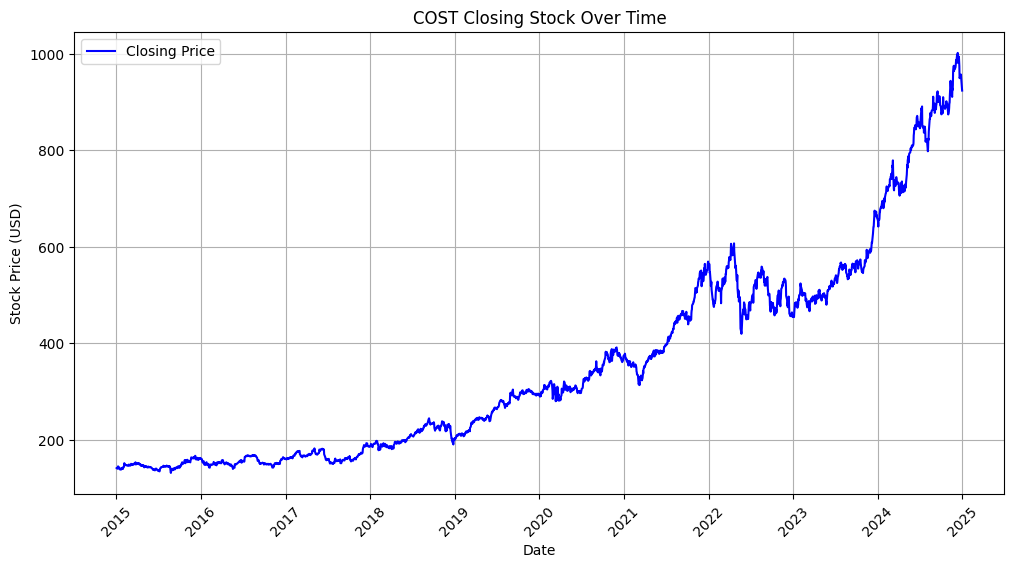

In [5]:
# Plot stock closing price over time
%matplotlib inline
plt.figure(figsize=(12, 6))
sns.lineplot(x=pd.to_datetime(df['date']), y=df["close"], label="Closing Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title(f"{ticker} Closing Stock Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

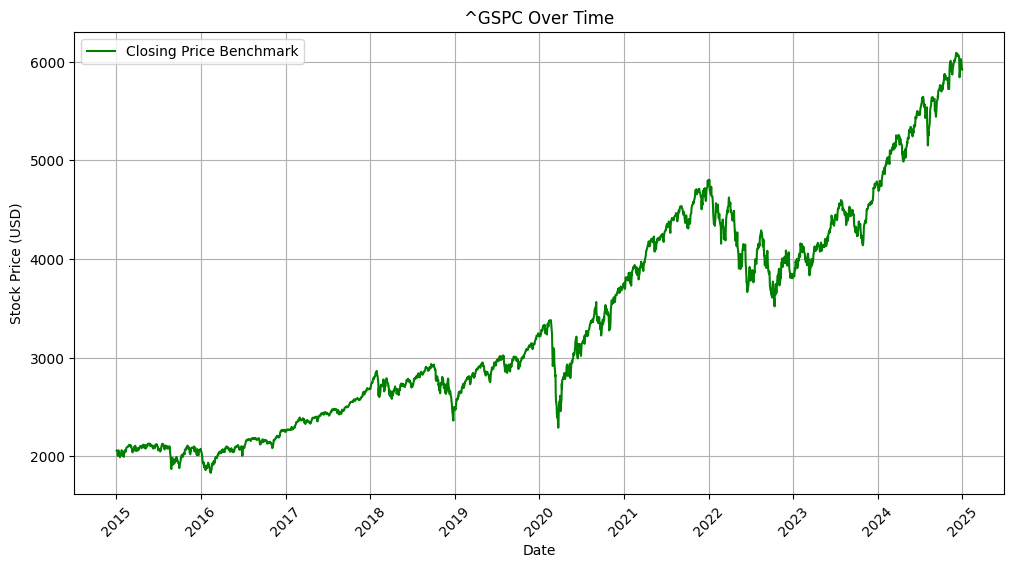

In [6]:
# Plot benchmark data over time
%matplotlib inline
plt.figure(figsize=(12, 6))
sns.lineplot(x=pd.to_datetime(df['date']), y=df["close_benchmark"], label="Closing Price Benchmark", color="green")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title(f"{benchmark_ticker} Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [7]:
from finrl.config import INDICATORS
from finrl.meta.preprocessor.preprocessors import FeatureEngineer

fe = FeatureEngineer(
    use_technical_indicator=True, 
    tech_indicator_list=INDICATORS,
    use_turbulence=True
)
df = fe.preprocess_data(df)

df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Successfully added technical indicators
Successfully added turbulence index


,date,open,high,low,close,volume,tic,day,close_benchmark,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence
0,2015-01-02,114.731598,141.610001,143.149994,141.869995,1471000,COST,4,2058.899902,0.000000,142.034547,141.525451,0.000000,-66.666667,100.000000,141.869995,141.869995,0.000000
1,2015-01-05,113.427208,140.000000,142.160004,141.690002,1748500,COST,0,2054.439941,-0.004038,142.034547,141.525451,0.000000,-66.666667,100.000000,141.779999,141.779999,0.000000
2,2015-01-06,114.926041,141.850006,142.940002,140.610001,3185200,COST,1,2022.150024,-0.038636,142.752934,140.027064,0.000000,7.390845,31.813915,141.389999,141.389999,0.000000
3,2015-01-07,116.927246,144.320007,144.429993,142.600006,2171600,COST,2,2005.550049,0.018423,143.336433,140.048570,62.144939,133.333333,64.305850,141.692501,141.692501,0.000000
4,2015-01-08,117.931885,145.559998,146.100006,145.559998,2937700,COST,3,2030.609985,0.166825,146.206710,138.725291,80.649034,128.668472,71.386788,142.466000,142.466000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2024-12-24,958.820007,958.820007,959.380005,950.739990,939000,COST,1,5984.629883,6.686498,1008.390208,947.460793,52.594806,-29.867942,10.541068,963.522001,927.430669,0.174038
2512,2024-12-26,956.140015,956.140015,959.409973,956.820007,969000,COST,3,6024.970215,5.133535,1008.879562,946.253440,53.751800,-29.802225,10.541068,964.217668,928.623503,0.184465
2513,2024-12-27,939.700012,939.700012,950.450012,948.719971,1943400,COST,4,6006.169922,3.212167,1010.228875,942.630122,52.002615,-69.053040,6.075481,964.841667,929.858002,0.749122
2514,2024-12-30,922.210022,922.210022,934.169983,931.000000,1881200,COST,0,5920.669922,0.256658,1013.916682,935.233312,48.435586,-126.718245,1.410646,964.975000,930.800668,3.108289


In [8]:
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv

class CustomStockTradingEnv(StockTradingEnv):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.reward_function = None

    def set_reward_function(self, reward_function):
        self.reward_function = reward_function

    def step(self, actions):
        next_state, reward, terminal, truncated, info = super().step(actions)

        if self.reward_function is not None:
            reward = self.reward_function(self, actions, next_state, reward, terminal, truncated, info)
        
        return next_state, reward, terminal, truncated, info

print("Loaded class CustomStockTradingEnv")

Loaded class CustomStockTradingEnv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
reward_logging = False  
overall_reward = 0  

def sample_custom_reward(self, actions, next_state, base_reward, terminal, truncated, info):
    import numpy as np
    import pandas as pd
    
    
    df_total_value = pd.DataFrame(self.asset_memory, columns=["account_value"])
    df_total_value["date"] = self.date_memory
    df_total_value["daily_return"] = df_total_value["account_value"].pct_change(1)
    
    
    df_total_value["benchmark_value"] = self.df["close_benchmark"].iloc[:len(df_total_value)].reset_index(drop=True)
    df_total_value["benchmark_daily_return"] = df_total_value["benchmark_value"].pct_change(1)
    
    
    remove_nan = lambda x: 0 if np.isnan(x) else x
    
    
    mean_returns = df_total_value["daily_return"].mean()
    std_returns = df_total_value["daily_return"].std()
    
    
    bench_returns = df_total_value["benchmark_daily_return"].mean()
    bench_std = df_total_value["benchmark_daily_return"].std()
    
    
    beta = 1.0  
    if bench_std and not np.isnan(bench_std) and bench_std != 0:
        portfolio_returns = df_total_value["daily_return"].fillna(0)
        benchmark_returns = df_total_value["benchmark_daily_return"].fillna(0)
        if len(portfolio_returns) == len(benchmark_returns):
            covariance = np.cov(portfolio_returns, benchmark_returns)[0][1]
            beta = covariance / (bench_std ** 2)
    
    # Compute Sharpe Ratio
    sharpe = 0
    if std_returns and not np.isnan(std_returns):
        sharpe = (252**0.5) * mean_returns / std_returns
    
    # Compute Sortino Ratio
    downside_returns = df_total_value["daily_return"][df_total_value["daily_return"] < 0]
    downside_std = downside_returns.std(ddof=1)
    
    sortino = 0
    if downside_std and not np.isnan(downside_std):
        sortino = (252**0.5) * mean_returns / downside_std
    
    # Compute Treynor Ratio
    treynor = 0
    if beta and not np.isnan(beta) and beta != 0:
        treynor = (252**0.5) * mean_returns / beta
    
    # Compute Differential Return
    diff_return = 0
    if beta and not np.isnan(beta) and beta != 0:
        diff_return = (mean_returns - bench_returns) / beta
    
    if reward_logging:
        print(f"Mean Daily Returns: {mean_returns}")
        print(f"Benchmark Returns: {bench_returns}")
        print(f"Daily Return Standard Deviation: {std_returns}")
        print(f"Downside Only Standard Deviation: {downside_std}")
        print(f"Beta: {beta}")
        print(f"Sharpe Ratio: {sharpe}")
        print(f"Sortino Ratio: {sortino}")
        print(f"Treynor Ratio: {treynor}")
        print(f"Differential Return: {diff_return}")
    
    
    w1, w2, w3, w4 = 0.1, 0.01, 0.01, 1.0
    total_reward = (
        w1 * remove_nan(mean_returns) 
        - w2 * remove_nan(abs(downside_std)) 
        + w3 * remove_nan(treynor) 
        + w4 * remove_nan(diff_return)
    )
    
    if reward_logging:
        print(f"Reward: {total_reward}")
        print("-----------------------------")
    
    global overall_reward
    overall_reward += total_reward
    
    return total_reward

print("Loaded custom reward function")


Loaded custom reward function


In [10]:
indicators = ["volume",	"macd", "boll_ub", "boll_lb", "rsi_30", "cci_30", "dx_30", "close_30_sma", "close_60_sma", "turbulence"]
turbulence_thresold=100

stock_dim = len(df["tic"].unique())
max_price = df['close'].max()
initial_amount = 10000
hmax = int(initial_amount / max_price)

env = CustomStockTradingEnv(
    df=df, 
    stock_dim=stock_dim, 
    hmax=hmax,
    initial_amount=initial_amount, 
    num_stock_shares=[0],
    print_verbosity=2,
    buy_cost_pct=[0.001],
    sell_cost_pct=[0.001],
    turbulence_threshold=turbulence_thresold,
    reward_scaling=1e-4,
    tech_indicator_list=indicators,
    state_space=1 + 2 * stock_dim + len(indicators) * stock_dim,
    action_space=stock_dim,
)

env

In [11]:

env.reset()
reward_logging = True
env.set_reward_function(sample_custom_reward)

env.step(np.array([5]))
env.step(np.array([-5]))
env.step(np.array([0]))
env.step(np.array([0]))
env.step(np.array([0]))
reward_logging = False

Mean Daily Returns: -0.0014483820190427377
Benchmark Returns: -0.002166186385468727
Daily Return Standard Deviation: nan
Downside Only Standard Deviation: nan
Beta: 1.0
Sharpe Ratio: 0
Sortino Ratio: 0
Treynor Ratio: -0.02299235175482821
Differential Return: 0.0007178043664259892
Reward: 0.0003430426469734333
-----------------------------
Mean Daily Returns: -0.0010434559325884774
Benchmark Returns: -0.00894166241673544
Daily Return Standard Deviation: 0.0005726519632222754
Downside Only Standard Deviation: 0.0005726519632222754
Beta: 0.003991867286778397
Sharpe Ratio: -28.925683441121933
Sortino Ratio: -28.925683441121933
Treynor Ratio: -4.149524074852863
Differential Return: 1.9785744156141887
Reward: 1.936969102752769
-----------------------------
Mean Daily Returns: -0.0006956372883923182
Benchmark Returns: -0.008697465683805842
Daily Return Standard Deviation: 0.0007258777880900655
Downside Only Standard Deviation: 0.0005726519632222754
Beta: -0.003181053646668179
Sharpe Ratio: -1

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


In [12]:
from stable_baselines3 import PPO
from stable_baselines3 import A2C

from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.monitor import Monitor
import warnings

warnings.filterwarnings("ignore")

env.reset()
vec_env = make_vec_env(lambda: Monitor(env, '/'), n_envs=1)

model = PPO("MlpPolicy", vec_env, verbose=1)

model.learn(total_timesteps=100000) 

Using cpu device


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-----------------------------
| time/              |      |
|    fps             | 148  |
|    iterations      | 1    |
|    time_elapsed    | 13   |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.52e+03    |
|    ep_rew_mean          | 0.937       |
| time/                   |             |
|    fps                  | 141         |
|    iterations           | 2           |
|    time_elapsed         | 28          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.006101407 |
|    clip_fraction        | 0.0515      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.41       |
|    explained_variance   | 0.0129      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00478     |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.001

In [13]:
obs = vec_env.reset()
vec_env.envs[0].unwrapped.episode = 0 
overall_reward = 0 

portfolio_values = []
timesteps = []

i = 0
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, done, info = vec_env.step(action)

    if done[0]:
        break

    portfolio_value = vec_env.envs[0].unwrapped.asset_memory[-1]
    portfolio_values.append(portfolio_value)
    timesteps.append(i)
    i += 1

day: 2515, episode: 0
begin_total_asset: 10000.00
end_total_asset: 64742.30
total_reward: 54742.30
total_cost: 9.90
total_trades: 2515
Sharpe: 1.019


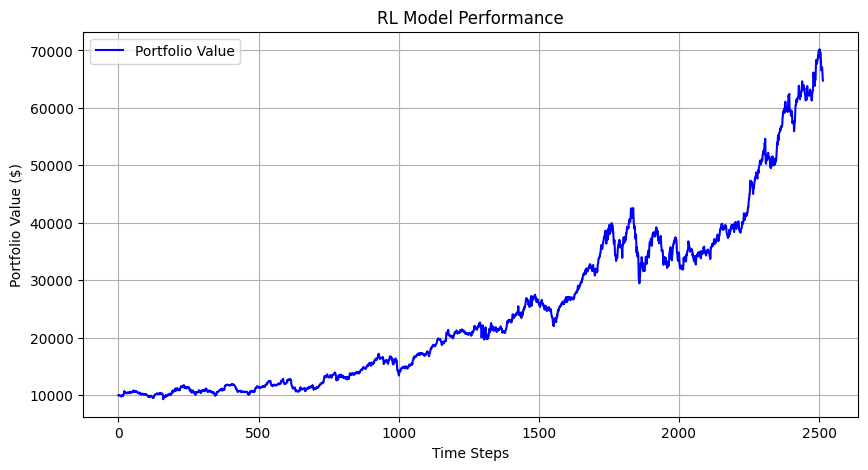

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(timesteps, portfolio_values, label="Portfolio Value", color='blue')
plt.xlabel("Time Steps")
plt.ylabel("Portfolio Value ($)")
plt.title("RL Model Performance")
plt.legend()
plt.grid()
plt.show()

In [15]:
model.save("Costco Wholesale Corporation")